# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from sklearn.utils import shuffle

# Training and Testing data downloaded from: https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
# this project assumes it is stored a directory up in a 'data' folder

training_file   = '../data/train.p'
validation_file = '../data/valid.p'
testing_file    = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# shuffle data
X_train, y_train = shuffle(train['features'], train['labels'])
X_valid, y_valid = shuffle(valid['features'], valid['labels'])
X_test, y_test   = shuffle(test['features'], test['labels'])

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# The traffic sign images shape (height x width x channels)
image_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])

# The unique classes/labels in the dataset are given in the signnames.csv file
n_classes = len(np.bincount(y_train)) # 43

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import pandas as pd
import random

# Include helper functions
%run helper.py
# Visualizations will be shown in the notebook.
%matplotlib inline

# dict that keeps track of counts 
# for each sign type and one example image of each
exploratoryImages = {
    "train": {},
    "valid": {},
    "test" : {}
}

# define helper for filling exploratory images
def fillExploratoryImages(X, y, imageType='train'):
    for i, image in enumerate(X):
        # label id for this traffic sign
        labelId = y[i]

        # set count to 1 if label type not yet seen
        # and add image to example image
        if not labelId in exploratoryImages[imageType]:
            exploratoryImages[imageType][labelId] = {"count": 1, "example": image.squeeze()}
        # if already seen, increment count of this
        # label type
        else:
            exploratoryImages[imageType][labelId]["count"] += 1
        
# use helper that we just defined
fillExploratoryImages(X_train, y_train, 'train')
fillExploratoryImages(X_valid, y_valid, 'valid')
fillExploratoryImages(X_test, y_test, 'test')

Showing examples of each traffic sign in training set...


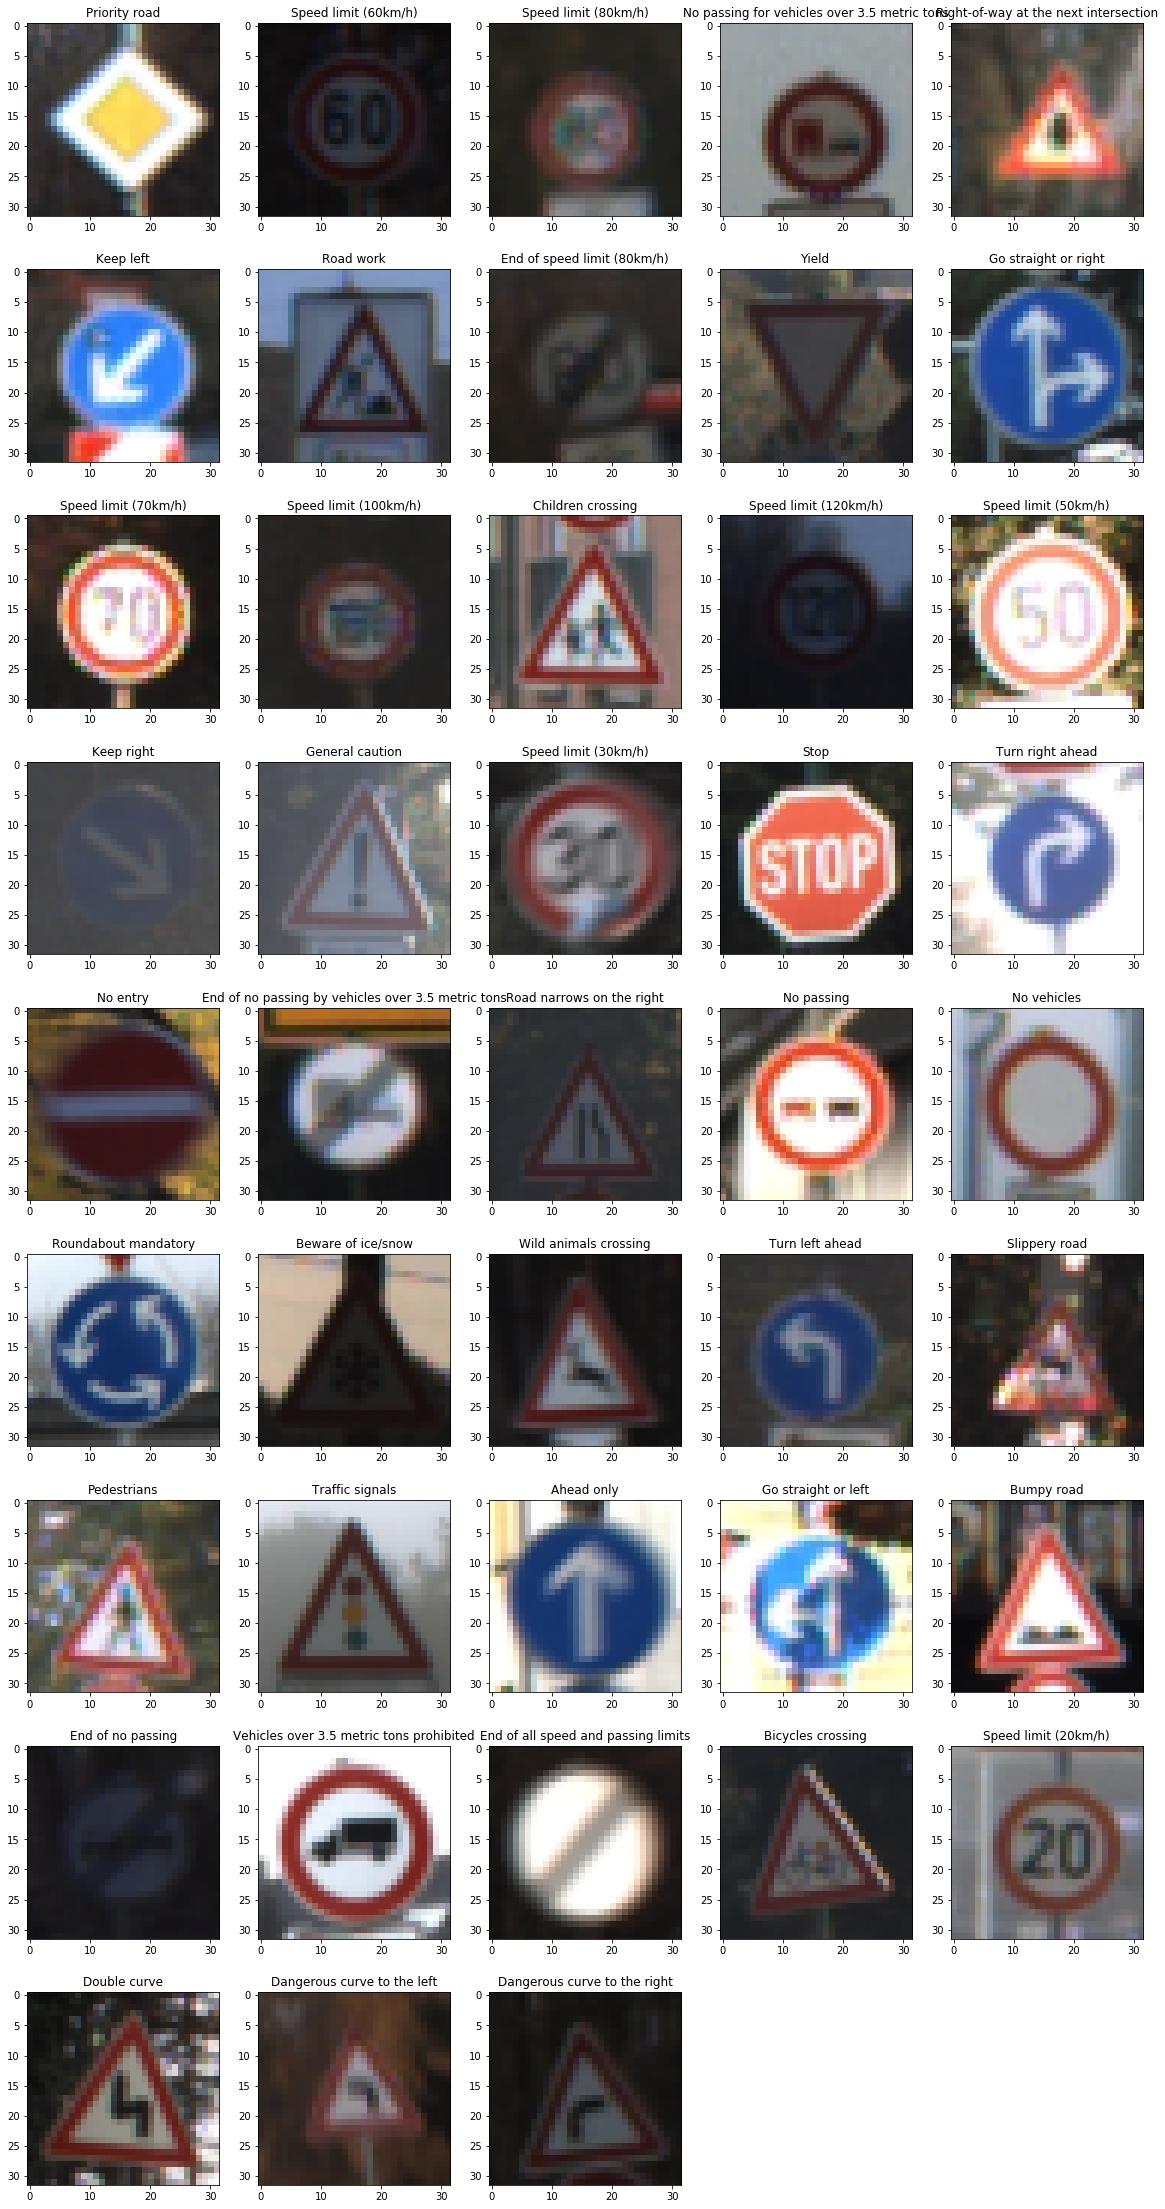

In [4]:
trainImages = [exploratoryImages['train'][i]["example"] for i in exploratoryImages['train']]
trainNames  = [trafficSignName(i) for i in exploratoryImages['train']]
print("Showing examples of each traffic sign in training set...")
plotImages(images=trainImages, 
           titles=trainNames, 
           columns=5, 
           figsize=(20, 40), 
           saveAs="./output_images/dataVisualization.jpg")

In [5]:
# blank data for bar chart
barData = np.zeros(shape=(n_classes, 3))

# helper function to fill barData with relevant data
def fillBarData(imageType, chartIndex): 
    for i in exploratoryImages[imageType]:
        barData[i][chartIndex] = exploratoryImages[imageType][i]["count"] 

fillBarData('train', 0)
fillBarData('valid', 1)
fillBarData('test',  2)

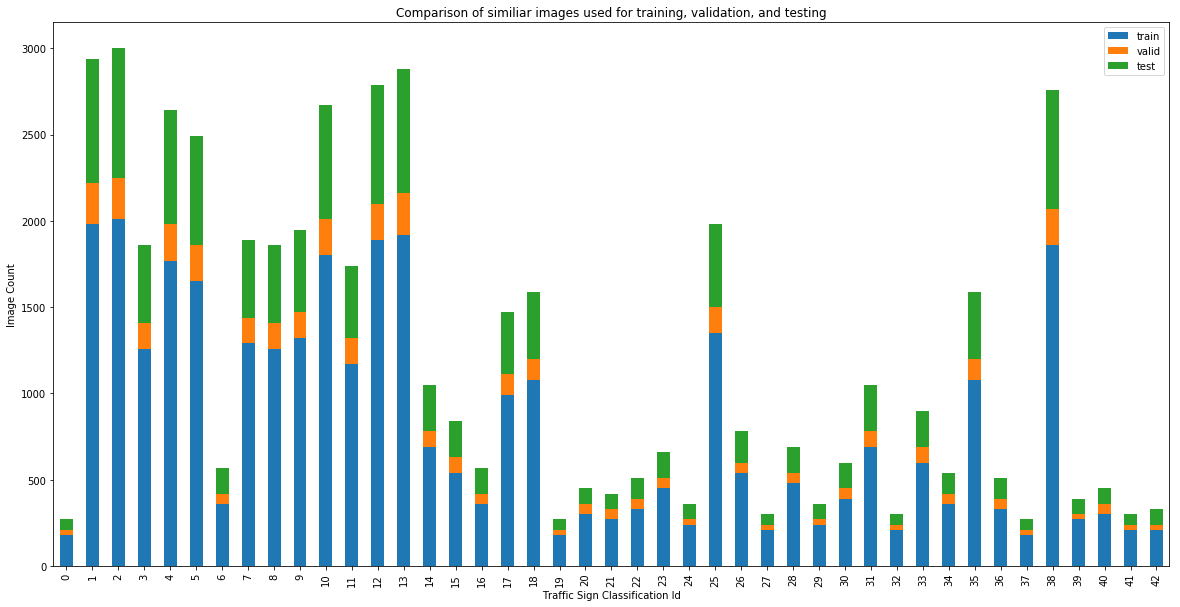

In [6]:
df2 = pd.DataFrame(barData, columns=['train', 'valid', 'test'])
ax = df2.plot.bar(stacked=True, figsize=(20,10), title="Comparison of similiar images used for training, validation, and testing")
ax.set(xlabel='Traffic Sign Classification Id', ylabel='Image Count')
fig = ax.get_figure()
fig.savefig("./output_images/dataDistribution.jpg")

Looking at the bar chart above, there is a lot of data variance that needs to be rectified. 

Getting the training data variance to zero involves generating enough images so that each bin contains the same amount (without throwing away any real training data!)

Examples of generated images...


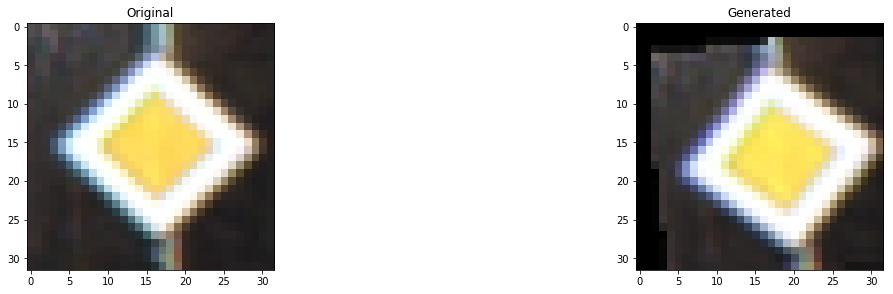

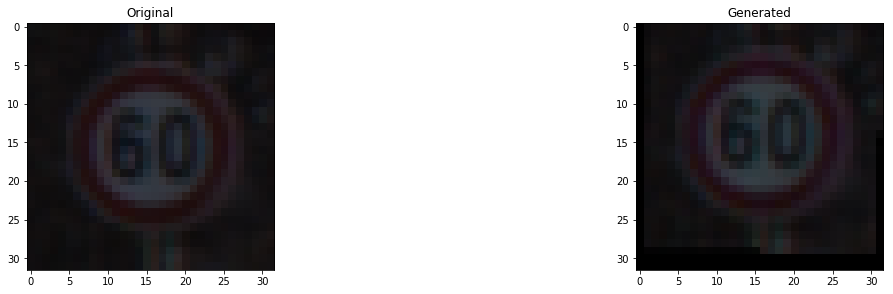

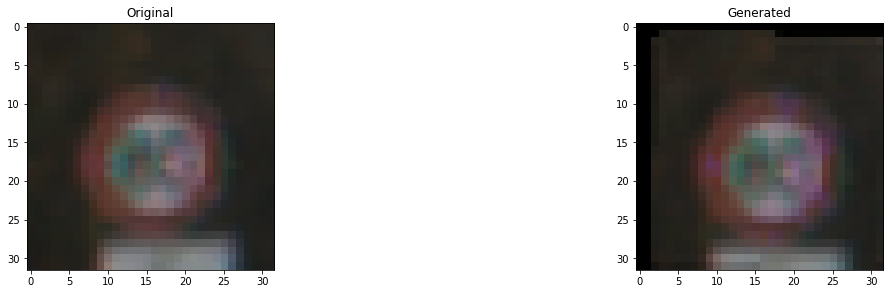

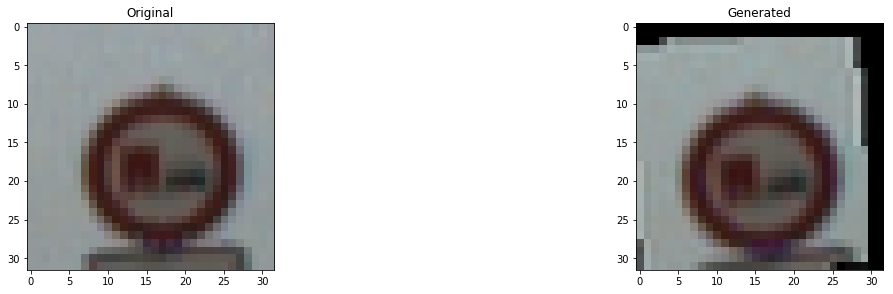

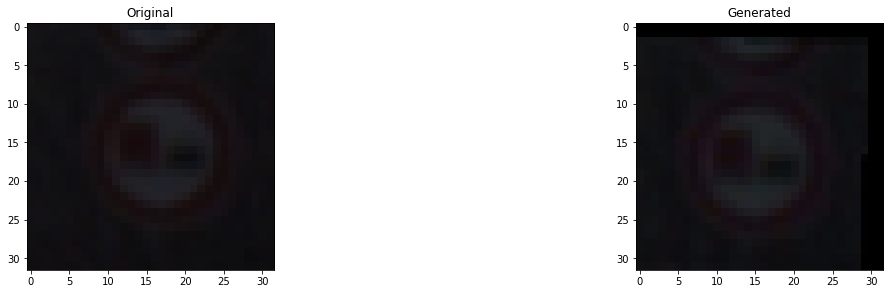

In [7]:
import random
import cv2

from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from scipy.ndimage.interpolation import rotate, shift, zoom

# Some ideas:              https://github.com/vxy10/ImageAugmentation
# Other ways to implement: https://www.scipy-lectures.org/packages/scikit-image/index.html

def createAugmentedImage(img):
    height, width, channels = img.shape
    
    # Convert RGB image to HLS
    hlsImage = cv2.cvtColor(np.copy(img), cv2.COLOR_RGB2HLS)
    # randomly alter the lighting
    hlsImage[:,:,0] = np.uint8(hlsImage[:,:,0] * random.uniform(0.8, 1.2))
    # convert back to rgb
    image = cv2.cvtColor(np.copy(hlsImage), cv2.COLOR_HLS2RGB)
    
    # rotate and shift the image
    image = rotate(image, random.uniform(-10, 10), reshape=False)
    image = shift(image, (random.uniform(-2, 2), random.uniform(-2, 2), 0))

    return image

print("Examples of generated images...")
for i in range(5):
    plotImages(images=[X_train[i], createAugmentedImage(X_train[i])], titles=["Original", "Generated"], columns=2)

In [19]:
def priorityBinCountsAndConributions(dSetY):
    '''
        returns a tuple representing the counts for each contributing data augmentation bin
        and how many generated images an image in a given bin will contribute
    '''

    # get information on the mean, bincount, and stddev of this data set
    yBinCount = np.bincount(dSetY)
    yMeanBin = np.mean(yBinCount)
    yStdDev = np.std(yBinCount)

    # print("Mean: ", yMeanBin, "StdDev: ", yStdDev)

    # The goal is to bring the variation to zero and to not throw away any real training data.
    # So, I will be generating enough data so that all bins have an equal amount 
    # Note: all bins below the mean were used before. That did not provide an adequate amount of variance.
    yPriorityBinCounts  = np.clip(np.floor(np.max(yBinCount) - yBinCount), a_min=0, a_max=None).astype(np.int64)
    # how much will each image contribute to the generated images for its given class
    yPriorityBinContrib = np.ceil(yPriorityBinCounts/yBinCount).astype(np.int64)

    return yPriorityBinCounts, yPriorityBinContrib

def augmentDataSet(dSetX, dSetY, debug=False):  
    # get the counts of how much to contribute from each bin and how much each 
    # existing image contributes to its respective bin
    priorityCount, priorityContrib = priorityBinCountsAndConributions(dSetY)

    # we will store our data newly generated images and labels here
    dSetXAug = []
    dSetYAug = []

    # go through all images in our data set
    for i, image in enumerate(dSetX):
        # save off the class (bin) corresponding to this data set
        classId = dSetY[i]
        
        # if y value matches that of a bin with images left to contribute
        if priorityCount[classId] > 0:
            # decrement bin count by how much this image class contributes per image
            priorityCount[classId] -= priorityContrib[classId]

            # create random augmented images
            for j in range(priorityContrib[classId]):
                # save off original image in case debug flag is set
                imOrig = image

                # create an augmented image
                imAug = createAugmentedImage(imOrig)
                                             
                # add it to list
                dSetXAug.append(imAug)   # append to X
                dSetYAug.append(classId) # append to y
        
                if debug:
                    debug = False # this only happens once
                    # display original image and newly generated image
                    plotImages(images=[imOrig, imAug], 
                               titles=["Original Image", "Augmented Image"], 
                               columns=2, 
                               gray=False,
                               saveAs='./output_images/originalAndGeneratedImages.jpg')
    
    return np.concatenate((np.array(dSetXAug), dSetX)), np.concatenate((np.array(dSetYAug), dSetY))

Augmenting training set....
Old X Shape = (34799, 32, 32, 3)
New X Shape = (86473, 32, 32, 3)
Old y Shape = (34799,)
New y Shape = (86473,)
Old Data Variance = 383681.363981
New Data Variance = 4.6976744186


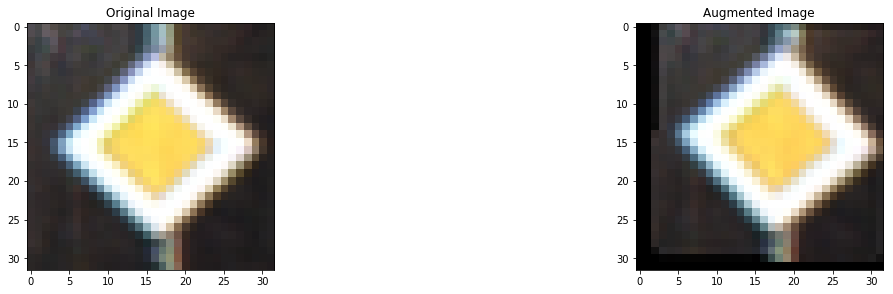

In [20]:
# augment data sets
print("Augmenting training set....")
X_train_aug, y_train_aug = augmentDataSet(X_train, y_train, debug=True)

# TODO: should validation and testing images be generated as well?

print("Old X Shape =", X_train.shape)
print("New X Shape =", X_train_aug.shape)

print("Old y Shape =", y_train.shape)
print("New y Shape =", y_train_aug.shape)

print("Old Data Variance =", np.var(np.bincount(y_train)))
print("New Data Variance =", np.var(np.bincount(y_train_aug)))

Now that images have been generated, let's visualize the label distribution

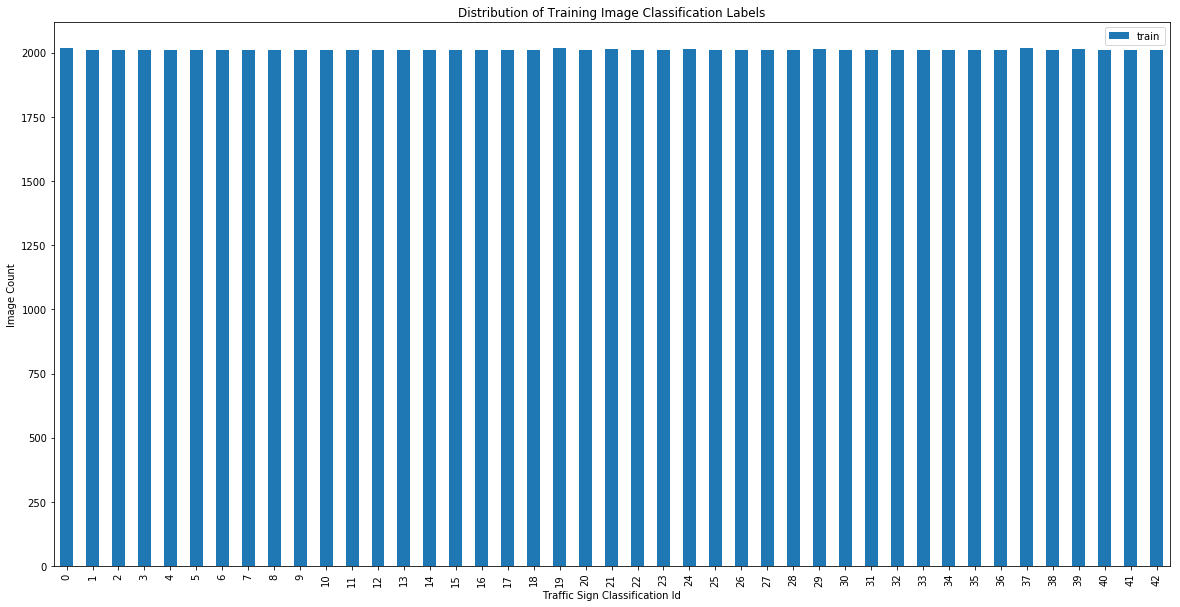

In [21]:
df2 = pd.DataFrame(np.bincount(y_train_aug), columns=['train'])
ax = df2.plot.bar(stacked=True, figsize=(20,10), title="Distribution of Training Image Classification Labels")
ax.set(xlabel='Traffic Sign Classification Id', ylabel='Image Count')
fig = ax.get_figure()
fig.savefig("./output_images/augmentedDataDistribution.jpg")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set

One goal of data preprocessing is that the image data should be normalized so that the data has mean zero and equal variance

To achieve this goal, the following steps are taken:

1. Rescale image dimensions to 32 by 32 
2. Normalize the image pixel value to be approx. within 0.0 and 1.0
3. Reduce to a 1-Channel (grayscaled) image

In [ ]:
import cv2

# Include helper functions
%run helper.py

# This can be a great help to anyone looking for different ways to augment their datasets: 
#                 https://github.com/vxy10/ImageAugmentation

def preprocessDataSet(dSet):
    '''
        dSet -> variable with shape (number of images, some height, some width, 3)
        
        returns data as a normalized and grayscaled image 
        with shape (number of images, 32, 32, 1) and values approx. between 0.0 and 1.0
    '''
    # Rescale the images in the input data set
    newData = [cv2.resize(image, dsize=(32, 32)) for image in dSet]
    
    # combine channels together by making each contribute 1/3rd 
    # of the 1 channel result
    newData = np.sum(np.array(newData)/3, keepdims=True, axis=3)

    # normalize the data between it's max and min range
    newData = newData / (np.max(newData) - np.min(newData))

    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    
    for i in range(len(newData)):
        newData[i] = np.expand_dims(cv2.filter2D(newData[i], -1, kernel), axis=3) 
        
    return newData

# helper for visualizing preprocessed images
def visualizeRandomPPImageInSet(X, X_pp, y, gray=False, saveAs=''):
    index = random.randint(0, len(X))
    labelStr = trafficSignName(y[index])
    
    plotImages(images=[X[index].squeeze(), X_pp[index].squeeze()], 
               titles=[labelStr, "Preprocessed " + labelStr],
               columns=2,
               figsize=(20, 10), gray=gray, saveAs=saveAs)

In [26]:
# preprocess all data
X_train_pp = preprocessDataSet(X_train_aug)
X_valid_pp = preprocessDataSet(X_valid)
X_test_pp  = preprocessDataSet(X_test)

print("Old Data Shape =", X_train.shape)
print("New Data Shape =", X_train_pp.shape)

print("Old Data Mean =", np.mean(X_train))
print("New Data Mean =", np.mean(X_train_pp))

Old Data Shape = (34799, 32, 32, 3)
New Data Shape = (86473, 32, 32, 1)
Old Data Mean = 82.677589037
New Data Mean = 0.289787117672


In [27]:
# visualize the preprocessing step on random images
nImages = 2
for i in range(nImages):
    visualizeRandomPPImageInSet(X=X_train_aug, X_pp=X_train_pp, y=y_train_aug, gray=True, 
                                saveAs='./output_images/originalAndPreprocessedImages.jpg')

TypeError: visualizeRandomPPImageInSet() got an unexpected keyword argument 'saveAs'

## LeNet-5 Architecture

![LeNet-5 Architecture](./LeNet5_Architecture.png)

In [ ]:
# Get tensor flow helper functions
%run tf_helper.py

In [ ]:
%run lenet.py

## Modified LeNet

In [ ]:
%run modlenet.py

## Multi-Scale Conolusional Network

I decided to implement the architecture described in [this](https://www.researchgate.net/publication/224260345_Traffic_sign_recognition_with_multi-scale_Convolutional_Networks) paper. 

A diagram in said paper that describes their architecture is given below:

![traffic_sign_recognition_with_multi-scale_convolusional_networks](./research/traffic_sign_recognition_with_multi-scale_convolusional_networks.jpg)

In [ ]:
# adapted from paper given in the previous cell
def MultiScaleConvNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    debug = True
    
    # Define initial filter dimension
    fil_dim = (5, 5, 6) # H, W, K
 
    # print("Stage 1: ")
    # print("Convolutional Layer 1...\n")
    # Note: relu=True signifies a ReLU activation function being applied internally
    conv = conv2d(x=x, filter_dim=fil_dim, stride=1, w_mean=mu, w_stddev=sigma, relu=True, debug=debug)
    
    # print("Max Pool and Dropout 1...\n")
    drop_rate = 0.0
    
    conv = maxpool_dropout(x=conv, drop_rate=drop_rate, k=2, stride=2, debug=debug)

    # print("Stage 2: ")
    # print("Convolutional Layer 2...\n")
    fil_dim = (5, 5, 16)
    
    conv = conv2d(x=conv, filter_dim=fil_dim, stride=1, w_mean=mu, w_stddev=sigma, relu=True, debug=debug)
    
    # print("Max Pool and Dropout 2...\n")
    drop_rate = 0.0
    
    conv = maxpool_dropout(x=conv, drop_rate=drop_rate, k=2, stride=2, debug=debug)
    stage2Conv = conv
    
    # print("Convolutional Layer 3...\n")
    fil_dim = (5, 5, 400)
    
    conv = conv2d(x=conv, filter_dim=fil_dim, stride=1, w_mean=mu, w_stddev=sigma, relu=True, debug=debug)
    
    # Flatten tensors from (h1 x w1 x d1) and (h2 x w2 x d2) to h1*w1*d1 and h2*w2*d2
    # then, combine them to form a (h1*w1*d1 + h2*w2*d2) dimensional tensor
    fc = tf_flatten_combine(stage2Conv, conv, debug=debug)
    
    n_classifiers = 43
    
    # Connect last layer to output logits
    logits = fullyConnectedLayer(x=fc, n_output=n_classifiers, w_mean=mu, w_stddev=sigma, debug=debug)
       
    return logits

### Training and Validating the Model

Getting the input images (x) and output labels (y) placeholders ready

In [ ]:
# initialize placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

# there are 43 possible labels
one_hot_y = tf.one_hot(y, n_classes)

Creating a training pipeline that uses the given model to classify the data.

In [34]:
learning_rate = 0.001

# connect model layers
logits = MultiScaleConvNet(x)

# define a loss function
loss_operation = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits))

# define an optimizer
training_operation = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss_operation)

# which logits correctly guessed the label
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# define a metric for accuracy
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

conv2d:
	Filter:  5 x 5 x 6
	Stride:  (1, 1)
	Input :  (?, 32, 32, 1)
	Output:  (?, 28, 28, 6)


maxpool2d:
	KSize :  (2, 2)
	Stride:  (2, 2)
	Input :  (?, 28, 28, 6)
	Output:  (?, 14, 14, 6)


* applied dropout of  0.0


conv2d:
	Filter:  5 x 5 x 16
	Stride:  (1, 1)
	Input :  (?, 14, 14, 6)
	Output:  (?, 10, 10, 16)


maxpool2d:
	KSize :  (2, 2)
	Stride:  (2, 2)
	Input :  (?, 10, 10, 16)
	Output:  (?, 5, 5, 16)


* applied dropout of  0.0


conv2d:
	Filter:  5 x 5 x 400
	Stride:  (1, 1)
	Input :  (?, 5, 5, 16)
	Output:  (?, 1, 1, 400)


tf_flatten_combine: (showing internal functions)


tf_flatten:
	Flattened  (?, 5, 5, 16)  to  (?, 400)


tf_flatten:
	Flattened  (?, 1, 1, 400)  to  (?, 400)




	tf_flatten_combine output:  (?, 800)


fullyConnectedLayer:
	Input :  (?, 800)
	Output:  (?, 43)




Define model evaluation functions

In [35]:
# evaluation function to be ran on batches
def evaluate(X_data, y_data):
    '''
        X_data -> input images
        Y_data -> input images labels
    '''
    # use globally defined batch size
    global BATCH_SIZE
    batch_size = BATCH_SIZE
    
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Run the training data through the training pipeline to train the model.

In [21]:
# Hyperparameters
EPOCHS = 20
BATCH_SIZE = 128

accuracy_tracker = []

saver = tf.train.Saver()

with tf.Session() as sess:
    # initialize the globals in the tensor flow session
    print("Initializing globals...")
    sess.run(tf.global_variables_initializer())
    
    # use the preprocessed training data
    trainX = X_train_pp
    trainY = y_train_aug
    validX = X_valid_pp
    validY = y_valid
    
    num_examples = len(trainX)
    
    print("Training...")
    print()
    
    for i in range(EPOCHS):
        # shuffle the training set before each epoch .
        trainX, trainY = shuffle(trainX, trainY)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = trainX[offset:end], trainY[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        # After each epoch, measure the loss and accuracy of the validation set.
        validation_accuracy = evaluate(validX, validY)
        # keep track of the accuracy for future graph goodness
        accuracy_tracker.append(validation_accuracy)
        
        # Ouput current accuracy after the current epoch
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    # Save the model after training.
    saver.save(sess, './model/modlenet.ckpt')
    print("Model saved")

Initializing globals...
Training...

EPOCH 1 ...
Validation Accuracy = 0.892

EPOCH 2 ...
Validation Accuracy = 0.920

EPOCH 3 ...
Validation Accuracy = 0.941

EPOCH 4 ...
Validation Accuracy = 0.933

EPOCH 5 ...
Validation Accuracy = 0.951

EPOCH 6 ...
Validation Accuracy = 0.947

EPOCH 7 ...
Validation Accuracy = 0.946

EPOCH 8 ...
Validation Accuracy = 0.951

EPOCH 9 ...
Validation Accuracy = 0.950

EPOCH 10 ...
Validation Accuracy = 0.949

EPOCH 11 ...
Validation Accuracy = 0.948

EPOCH 12 ...
Validation Accuracy = 0.950

EPOCH 13 ...
Validation Accuracy = 0.948

EPOCH 14 ...
Validation Accuracy = 0.955

EPOCH 15 ...
Validation Accuracy = 0.956

EPOCH 16 ...
Validation Accuracy = 0.956

EPOCH 17 ...
Validation Accuracy = 0.951

EPOCH 18 ...
Validation Accuracy = 0.953

EPOCH 19 ...
Validation Accuracy = 0.946

EPOCH 20 ...
Validation Accuracy = 0.946

Model saved


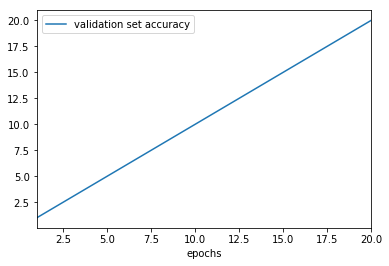

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({"epochs": range(1, EPOCHS + 1),
                   "validation set accuracy" : accuracy_tracker})
df.plot(x="epochs", y=["validation set accuracy"])
plt.show()

## Log

| Date     | Validation Set Accuracy (%) | Test Set Accuracy (%) | Architecture | Epochs | Batch | Training Data Mean   |  Learning Rate | Notes |
|:--------:|:-----:|:---:|:------------:|:------:|:-----:|:--------------------:|:--------------:|:-----:|
| 09/19/18 | 89.5  | N/A   | Basic LeNet  | 10     | 128   | 1.0  | 0.001 | initial run|
| 09/19/18 | ??    | N/A   | SimpNet      | 10     | 128   | 1.0  | 0.001 | incorrecly implemented, too large to run|
| 09/20/18 | 91.1  | N/A   | Mod.  LeNet  | 15     | 128   | 1.0  | 0.001 | added epochs|
| 09/20/18 | 90.2  | N/A   | Mod.  LeNet  | 15     | 128   | 1.0  | 0.001 | 50% Dropout added after each max pool|
| 09/20/18 | 91.4  | N/A   | Mod.  LeNet  | 15     | 128   | 0.32 | 0.001 | reverted to 0% Dropout, lowered mean|
| 09/20/18 | 91.6  | N/A   | Mod.  LeNet  | 15     | 128   | 0.32 | 0.001 | sharpened images |
| 09/21/18 | 92.8  | 91.0  | Mod.  LeNet  | 15     | 128   | 0.32 | 0.001 | Reduced label variance by 57% by generating zoomed in, rotated training images |
| 09/21/18 | ??.?  | ??.?  | Mod.  LeNet  | 15     | 128   | 0.32 | 0.001 | Generating zoomed in and out images. Chrome instance froze when training. |
| 09/21/18 | 87.8  | 89.9  | Mod. LeNet2  | 15     | 128   | 0.32 | 0.001 | Reverted last change. Made changes based on Table 1 of [this](https://www.researchgate.net/publication/241191907_A_committee_of_neural_networks_for_traffic_sign_classification) paper.|
| 09/21/18 | ??.?  | ??.?  | Mod. LeNet2  | 15     | 128   | 0.32 | 0.001 | Played with max pool strides, changing convolusions to 3x3x6, 50% drop rate, etc. Still too slow. Too impatient to wait for it to train. Erasing this abomination.. |
| 09/22/18 | 93.3  | 92.8  | Multi-Scale Conv. Network  | 15     | 128   | 0.32 | 0.001 | Threw in the towel and decided to switch to an architecture that a previous Udacity [student](https://github.com/jeremy-shannon/CarND-Traffic-Sign-Classifier-Project) has used. I implemented it from [this](https://www.researchgate.net/publication/224260345_Traffic_sign_recognition_with_multi-scale_Convolutional_Networks) paper. |
| 09/22/18 | 92.9  | 91.3  | Multi-Scale Conv. Network  | 20     | 128   | 0.32 | 0.001 | Increased batch size and added a drop rate of 50% after each max-pool |
| 09/23/18 | 92.4  | 91.2  | Multi-Scale Conv. Network  | 20     | 128   | 0.32 | 0.001 | Reverted the drop rate change. Added more generated images with random translating, scaling, shearing, rotating, and brightness applied.  |
| 09/23/18 | 94.6  | 93.3  | Multi-Scale Conv. Network  | 20     | 128   | 0.32 | 0.001 | Removed shearing and scaling. Reduced allowed manipulation range of lighting.  |

### Evaluating the Model

Evaluating the performance of the model on the test set.

Note: In order to not invalidate the results of the test, do not run this more than once. Reset all variables in notebook if further evaluations are needed.

In [ ]:
with tf.Session() as sess:
    # initialize the globals in the tensor flow session
    print("Initializing globals...")
    sess.run(tf.global_variables_initializer())
    
    # use the preprocessed training and test data
    testX = X_test_pp
    testY = y_test
    
    # load stored model
    saver = tf.train.import_meta_graph('./model/modlenet.ckpt.meta')
    saver.restore(sess, "./model/modlenet.ckpt")
    
    test_accuracy = evaluate(testX, testY)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

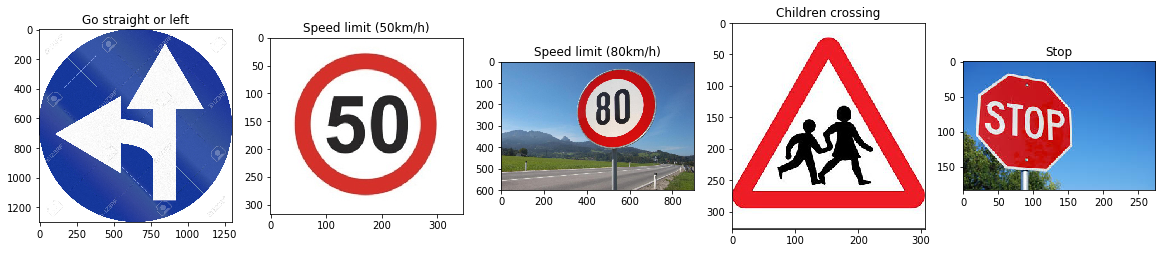

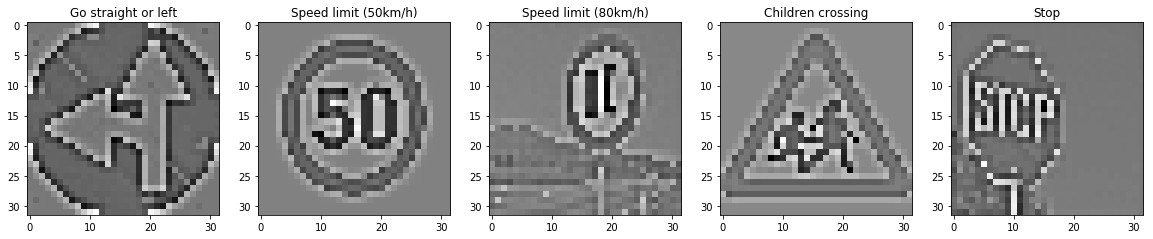

In [41]:
### Loading and visualizing the test images
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf

# need plotting helper
%run helper.py

new_images = []
new_images_orig = []
new_labels = [37, 2, 5, 28, 14] # TODO: hardcoded this is already known ahead of time


# read in test images and
# apply data preprocessing pipeline
for fileName in glob.glob('./test_images/*.jpg'):
    new_image = plt.imread(fileName)
    new_images_orig.append(new_image)
    new_images.append(preprocessDataSet([new_image])[0])
    # Note: images used were found in https://github.com/lfiaschi/udacity-traffic-sign-classifier/tree/master/images_signs 

# numpyify 
new_images = np.array(new_images)

# visualize preprocessed test images
plotImages(images=new_images_orig, 
           titles=[trafficSignName(new_labels[i]) for i in range(len(new_labels))], 
           columns=5, 
           figsize=(20, 10),
           gray=False,
           saveAs='./output_images/onlineTrafficSignImages.jpg')

plotImages(images=new_images.squeeze().tolist(), 
           titles=[trafficSignName(new_labels[i]) for i in range(len(new_labels))], 
           columns=5, 
           figsize=(20, 10),
           gray=True,
           saveAs='./output_images/onlineTrafficSignImagesPreprocessed.jpg')

### Analyze Performance

In [43]:
with tf.Session() as sess:
    # initialize the globals in the tensor flow session
    print("Initializing globals...")
    sess.run(tf.global_variables_initializer())
    
    # use the preprocessed training and test data
    testX = new_images
    testY = new_labels
    
    # load stored model
    saver = tf.train.import_meta_graph('./model/modlenet.ckpt.meta')
    saver.restore(sess, "./model/modlenet.ckpt")
    
    new_accuracy = evaluate(testX, testY)
    print("New Image Set Accuracy = {:.3f}".format(new_accuracy))
    
# TODO: add a log and record the current state of train/valid, test, and new image stats along with the current architecture and dropout rate

Initializing globals...
INFO:tensorflow:Restoring parameters from ./model/modlenet.ckpt
New Image Set Accuracy = 0.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [44]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
top_predictions = tf.nn.top_k(tf.nn.softmax(logits), k=5)

with tf.Session() as sess:
    # initialize the globals in the tensor flow session
    print("Initializing globals...")
    sess.run(tf.global_variables_initializer())
    
    # use the preprocessed training and test data
    testX = new_images
    testY = new_labels
    
    # load stored model
    saver = tf.train.import_meta_graph('./model/modlenet.ckpt.meta')
    saver.restore(sess, "./model/modlenet.ckpt")
    
    topPredictions = sess.run(top_predictions, feed_dict={x: testX, y: testY})

Initializing globals...
INFO:tensorflow:Restoring parameters from ./model/modlenet.ckpt


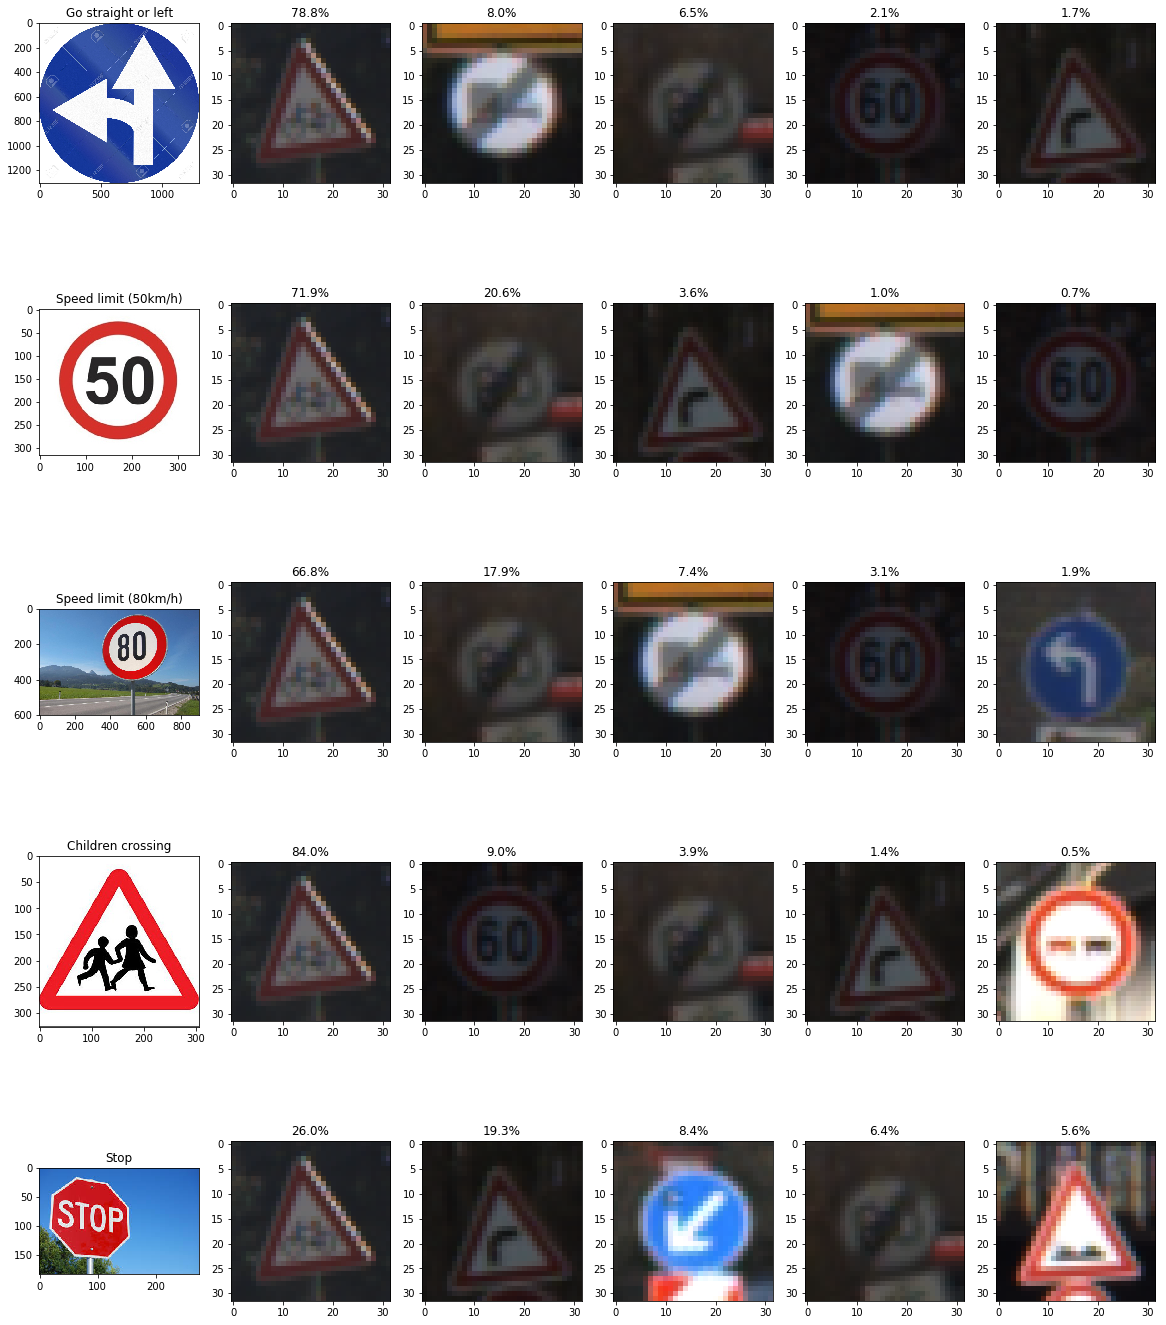

In [45]:
topPercentages = topPredictions[0]
topLabels = topPredictions[1]

possibleTitles = []
possibleImages = []

for i, percentages in enumerate(topPercentages):
    possibleTitles += [trafficSignName(new_labels[i])]
    possibleImages += [new_images_orig[i]]

    for j, labelId in enumerate(topLabels[i]):
        labelIdStr = trafficSignName(labelId)
        percentStr = "{:.1f}%".format(percentages[j]*100)
        possibleTitles += [percentStr]
        possibleImages += [exploratoryImages["train"][labelId]["example"]]

plotImages(images=possibleImages, 
           titles=possibleTitles, 
           columns=6, 
           figsize=(20,30),
           saveAs='./output_images/onlineTrafficSignImagesPredictions.jpg')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [27]:
### Visualize your network's feature maps here.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    image_input = preprocessData(image_input)
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [28]:
outputFeautureMap(X_train[0], )

NameError: name 'outputFeautureMap' is not defined

# Non-Working Attempted Architectures

## SimpNet ([paper](https://arxiv.org/pdf/1802.06205.pdf))

![SimpNet Architecture](./SimpNet_Architecture.jpg)
Figure 6 of "Towards Principled Design of Deep
Convolutional Networks: Introducing SimpNet"
       
The model consists of 13 convolutional layers with max-pooling and dropout operations after every 5 layers and a global max pooling operation after the last convolution. (Note: dropout not shown in the figure)

Also, each convolution is followed by a batch normalization layer and SC.

I implemented the model without batch normalization after each convolusion and without SC. The model was too big for me to run on my tiny CPU...

In [ ]:
# Get code for the SimpNet model
#%run simpnet.py